# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is '/Users/benjaminengel/Downloads/'



<span style="color:red"> **IF THE CODE ABOVE DID NOT FIND YOUR DOWNLOADED FILE, UNCOMMENT AND CHANGE THE `"YOUR FILEPATH HERE"` VARIABLE ONLY IN THE CELL BELOW**

In [2]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
##RAW_FILE = r"YOUR FILEPATH HERE"

<span style="color:red"> **DO NOT CHANGE ANYTHING IN THE CELL BELOW**

In [3]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'/Users/benjaminengel/Downloads/Crimes_-_2001_to_Present.csv'

In [4]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [5]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856198,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7856199,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
7856200,13128066,JG325838,06/06/2023 03:42:00 PM,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)"
7856201,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"


In [6]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
2206735,1309918,G000412,01/01/2001 01:00:00 AM,032XX N SHEFFIELD AV,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,...,NaN,06,1169005.0,1921458.0,2001,08/17/2015 03:03:40 PM,41.940001,-87.654258,"(41.940000996, -87.654258339)",2001-01-01 01:00:00
5076841,5462733,HN290220,01/01/2001 01:00:00 AM,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,40.0,20,1178551.0,1866538.0,2001,04/25/2007 05:57:12 AM,41.789084,-87.620849,"(41.789084341, -87.620849345)",2001-01-01 01:00:00
2207037,1311269,G001223,01/01/2001 01:00:00 AM,076XX S COLFAX AV,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,NaN,14,1194808.0,1854873.0,2001,08/17/2015 03:03:40 PM,41.756690,-87.561625,"(41.756689633, -87.561625217)",2001-01-01 01:00:00
2208176,1314713,G001044,01/01/2001 01:00:00 PM,017XX W AUGUSTA BV,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,...,NaN,04A,1164232.0,1906669.0,2001,08/17/2015 03:03:40 PM,41.899521,-87.672220,"(41.899521453, -87.672219588)",2001-01-01 01:00:00
2207020,1311226,G000964,01/01/2001 01:00:00 AM,022XX W CORNELIA AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1160728.0,1923242.0,2001,08/17/2015 03:03:40 PM,41.945072,-87.684629,"(41.945072291, -87.684629263)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178539,13153385,JG356233,07/26/2023 12:55:00 AM,028XX E 77TH PL,0810,THEFT,OVER $500,APARTMENT,False,False,...,43.0,06,1196713.0,1854174.0,2023,08/02/2023 04:54:41 PM,41.754724,-87.554667,"(41.754724423, -87.554667078)",2023-07-26 12:55:00
178564,13153405,JG356229,07/26/2023 12:55:00 AM,060XX W 64TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,64.0,14,1137216.0,1861475.0,2023,08/02/2023 04:54:41 PM,41.776031,-87.772534,"(41.776030572, -87.772534138)",2023-07-26 12:55:00
179312,27653,JG356231,07/26/2023 12:55:00 AM,086XX S KINGSTON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,46.0,01A,1194659.0,1848281.0,2023,08/02/2023 04:54:41 PM,41.738604,-87.562388,"(41.738604322, -87.562387717)",2023-07-26 12:55:00
178636,13154525,JG357430,07/26/2023 12:56:00 PM,019XX W CULLERTON ST,0820,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,...,31.0,06,1163781.0,1890422.0,2023,08/02/2023 04:54:41 PM,41.854948,-87.674334,"(41.854947826, -87.674334299)",2023-07-26 12:56:00


## Separate the Full Dataset by Years

In [7]:
chicago_full['Datetime'].dt.year

2206735    2001
5076841    2001
2207037    2001
2208176    2001
2207020    2001
           ... 
178539     2023
178564     2023
179312     2023
178636     2023
179135     2023
Name: Datetime, Length: 7856203, dtype: int64

In [8]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486806
2001    485885
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370506
2011    351975
2012    336276
2013    307479
2014    275748
2016    269814
2017    269099
2018    268818
2015    264777
2019    261295
2022    238742
2020    212176
2021    208761
2023    143608
Name: Year, dtype: int64

In [9]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [10]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,2001,41.899521,-87.672220
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.945072,-87.684629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 12:55:00,13153385,07/26/2023 12:55:00 AM,THEFT,OVER $500,APARTMENT,False,False,421,4.0,7.0,2023,41.754724,-87.554667
2023-07-26 12:55:00,13153405,07/26/2023 12:55:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,812,8.0,13.0,2023,41.776031,-87.772534
2023-07-26 12:55:00,27653,07/26/2023 12:55:00 AM,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,423,4.0,7.0,2023,41.738604,-87.562388


In [11]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [12]:
FINAL_DROP = ['Year']

In [13]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [14]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [15]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [16]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258
1,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
2,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,41.756690,-87.561625
3,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,41.899521,-87.672220
4,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629
...,...,...,...,...,...,...,...,...,...,...,...,...
0,12940914,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,212,2.0,4.0,41.829329,-87.606846
1,12944392,01/01/2023 01:00:00 PM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,915,9.0,11.0,41.833927,-87.641312
2,12938864,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2524,25.0,31.0,41.926884,-87.720720
3,12939172,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,412,4.0,8.0,41.740095,-87.578202


In [17]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    5
2002    5
2003    5
2004    5
2005    5
2006    5
2007    5
2008    5
2009    5
2010    5
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
2021    5
2022    5
2023    5
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

**Task - Stakeholder Questions**

**Import and Confirmation of Saved Files**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import os,glob

import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

plt.rcParams['figure.figsize'] = [10,5]

In [19]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7856203 entries, 2001-01-01 01:00:00 to 2023-07-26 12:57:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 734.2+ MB


**Remove Non Criminal Primary Types**

In [41]:
not_crime = chicago_final['Primary Type'].str.startswith('NON')

In [42]:
chicago = chicago_final[~not_crime]
chicago

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,years,Count
Datetime,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258,2001,1
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849,2001,1
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625,2001,1
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,2001,41.899521,-87.672220,2001,1
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.945072,-87.684629,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 12:55:00,13153385,07/26/2023 12:55:00 AM,THEFT,OVER $500,APARTMENT,False,False,421,4.0,7.0,2023,41.754724,-87.554667,2023,1
2023-07-26 12:55:00,13153405,07/26/2023 12:55:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,812,8.0,13.0,2023,41.776031,-87.772534,2023,1
2023-07-26 12:55:00,27653,07/26/2023 12:55:00 AM,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,423,4.0,7.0,2023,41.738604,-87.562388,2023,1


**Question One: Comparing Police Districts**

Which district has the most crimes? Which has the least?

In [43]:
#Values for each district
districtcounts = chicago['District'].value_counts().sort_values()
districtcounts

21.0         4
31.0       246
20.0    139080
17.0    226719
24.0    237584
22.0    257372
16.0    263105
14.0    303786
1.0     318375
15.0    336101
10.0    338520
5.0     347837
18.0    352761
19.0    353166
2.0     372249
9.0     383577
12.0    389810
3.0     398423
4.0     446106
25.0    446681
7.0     453455
6.0     459496
11.0    503827
8.0     527646
Name: District, dtype: int64

In [44]:
districtcounts.values.sum()

7855926

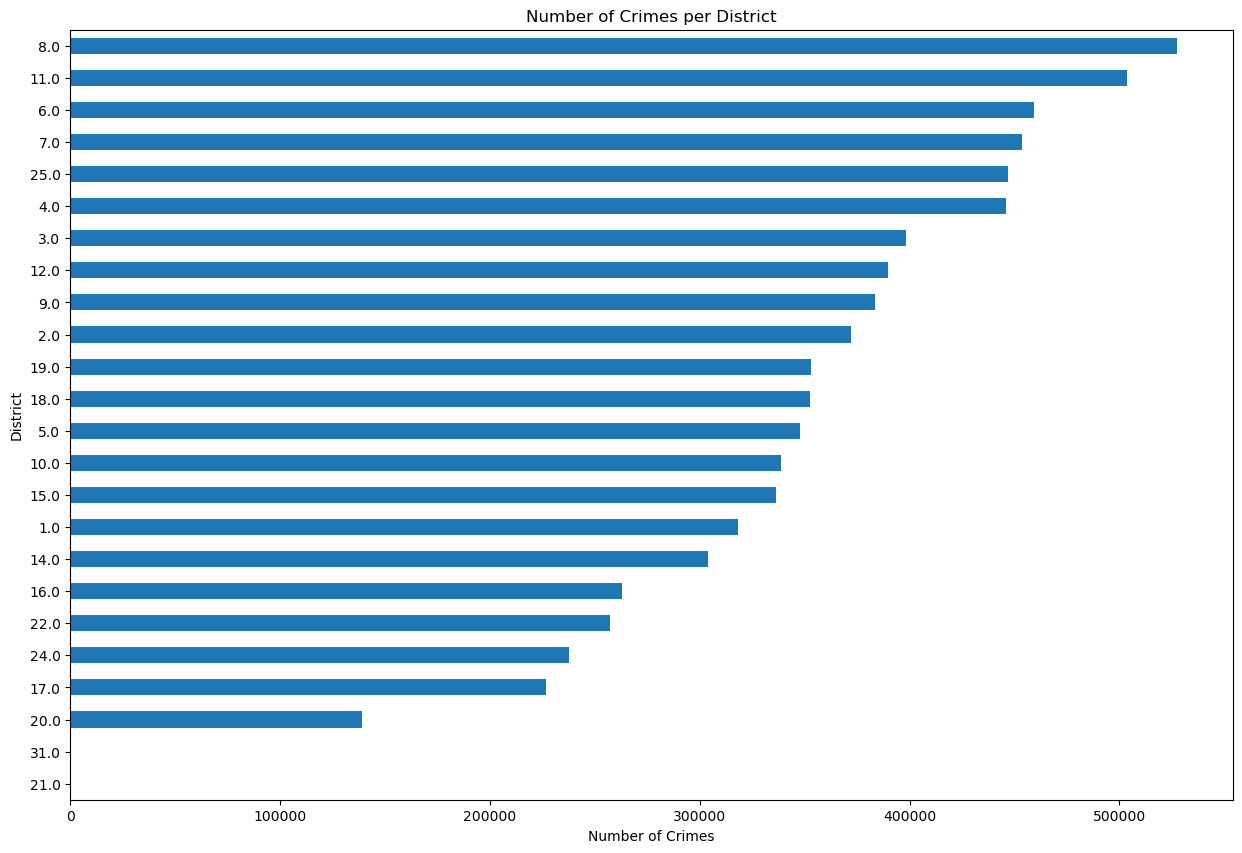

In [45]:
fig, ax = plt.subplots(figsize=(15, 10))
districtcounts.plot(kind='barh')

plt.xlabel('Number of Crimes')
plt.ylabel('District')
plt.title('Number of Crimes per District');

District 8 has the most crimes. District 21 has the least crimes.

**Question Two: Crimes Across the Years**

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [46]:
chicago2 = chicago_final[~not_crime]
chicago2

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,years,Count
Datetime,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258,2001,1
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849,2001,1
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625,2001,1
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,2001,41.899521,-87.672220,2001,1
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.945072,-87.684629,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 12:55:00,13153385,07/26/2023 12:55:00 AM,THEFT,OVER $500,APARTMENT,False,False,421,4.0,7.0,2023,41.754724,-87.554667,2023,1
2023-07-26 12:55:00,13153405,07/26/2023 12:55:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,812,8.0,13.0,2023,41.776031,-87.772534,2023,1
2023-07-26 12:55:00,27653,07/26/2023 12:55:00 AM,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,423,4.0,7.0,2023,41.738604,-87.562388,2023,1


In [47]:
chicago2['Year'] = chicago2.index.year

/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_61936/1702586733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago2['Year'] = chicago2.index.year


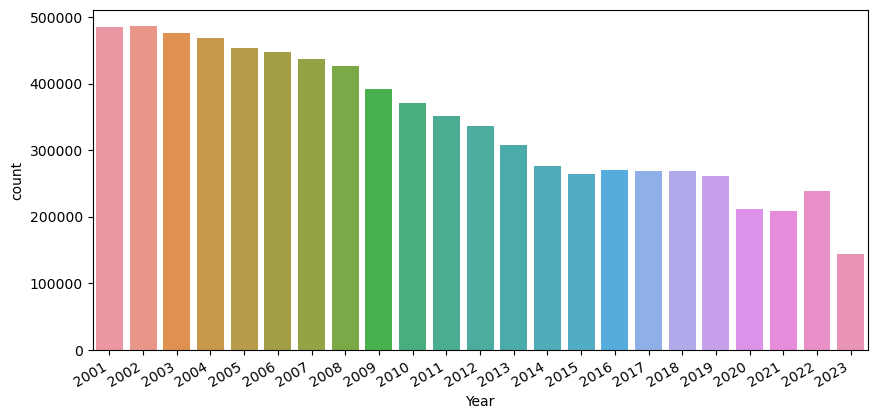

In [48]:
## Visualize years
ax = sns.countplot(data=chicago2, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [49]:
chicago2['Year'].value_counts().sort_index(ascending = False)

2023    143606
2022    238737
2021    208757
2020    212175
2019    261291
2018    268779
2017    269060
2016    269759
2015    264741
2014    275721
2013    307472
2012    336268
2011    351975
2010    370505
2009    392825
2008    427169
2007    437087
2006    448179
2005    453772
2004    469421
2003    475983
2002    486806
2001    485885
Name: Year, dtype: int64

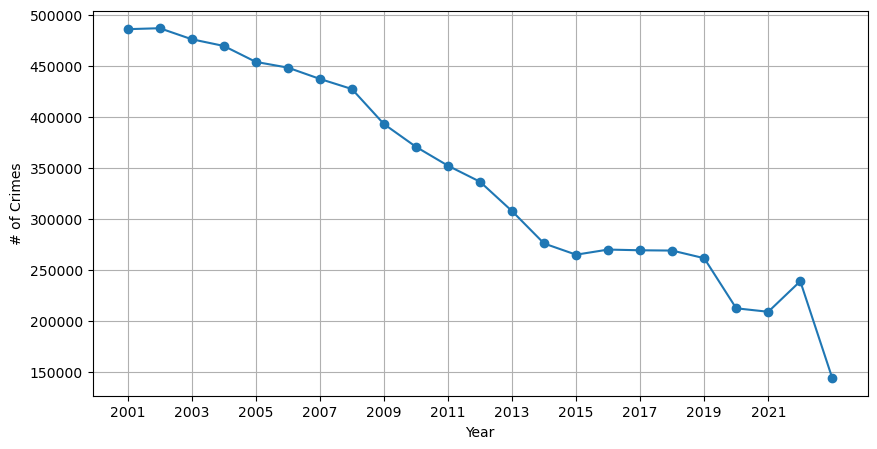

In [51]:
#Save year counts
year_counts = chicago2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

plt.xticks(np.arange(2001, 2022, step=2));

In [52]:
chicago2

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,years,Count
Datetime,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258,2001,1
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849,2001,1
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625,2001,1
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,2001,41.899521,-87.672220,2001,1
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.945072,-87.684629,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 12:55:00,13153385,07/26/2023 12:55:00 AM,THEFT,OVER $500,APARTMENT,False,False,421,4.0,7.0,2023,41.754724,-87.554667,2023,1
2023-07-26 12:55:00,13153405,07/26/2023 12:55:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,812,8.0,13.0,2023,41.776031,-87.772534,2023,1
2023-07-26 12:55:00,27653,07/26/2023 12:55:00 AM,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,423,4.0,7.0,2023,41.738604,-87.562388,2023,1


In [54]:
individual_crimes = chicago2.groupby('Primary Type').resample('M').size()

In [55]:
individual_crimes = individual_crimes.unstack().T
individual_crimes

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,NaN,162.0,3966.0,3.0,1192.0,1398.0,...,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,NaN,134.0,3665.0,1.0,1063.0,1163.0,...,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,149.0,4617.0,4.0,1141.0,1313.0,...,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7766.0,345.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,132.0,4922.0,2.0,1133.0,1199.0,...,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8887.0,1997.0,1.0,155.0,4757.0,2.0,1067.0,1261.0,...,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,29.0,1755.0,3405.0,570.0,17.0,NaN,2320.0,111.0,440.0,1479.0,...,1395.0,7.0,0.0,66.0,NaN,685.0,102.0,38.0,4445.0,631.0
2023-04-30,36.0,1807.0,3599.0,594.0,12.0,NaN,2430.0,121.0,363.0,1399.0,...,1221.0,5.0,0.0,82.0,NaN,752.0,113.0,38.0,4329.0,688.0
2023-05-31,54.0,2013.0,3947.0,612.0,9.0,NaN,2579.0,147.0,389.0,1282.0,...,1223.0,5.0,2.0,81.0,NaN,771.0,126.0,40.0,4685.0,821.0


In [56]:
individual_crimes = individual_crimes.fillna(0.0)
individual_crimes.isna().sum().sum()

0

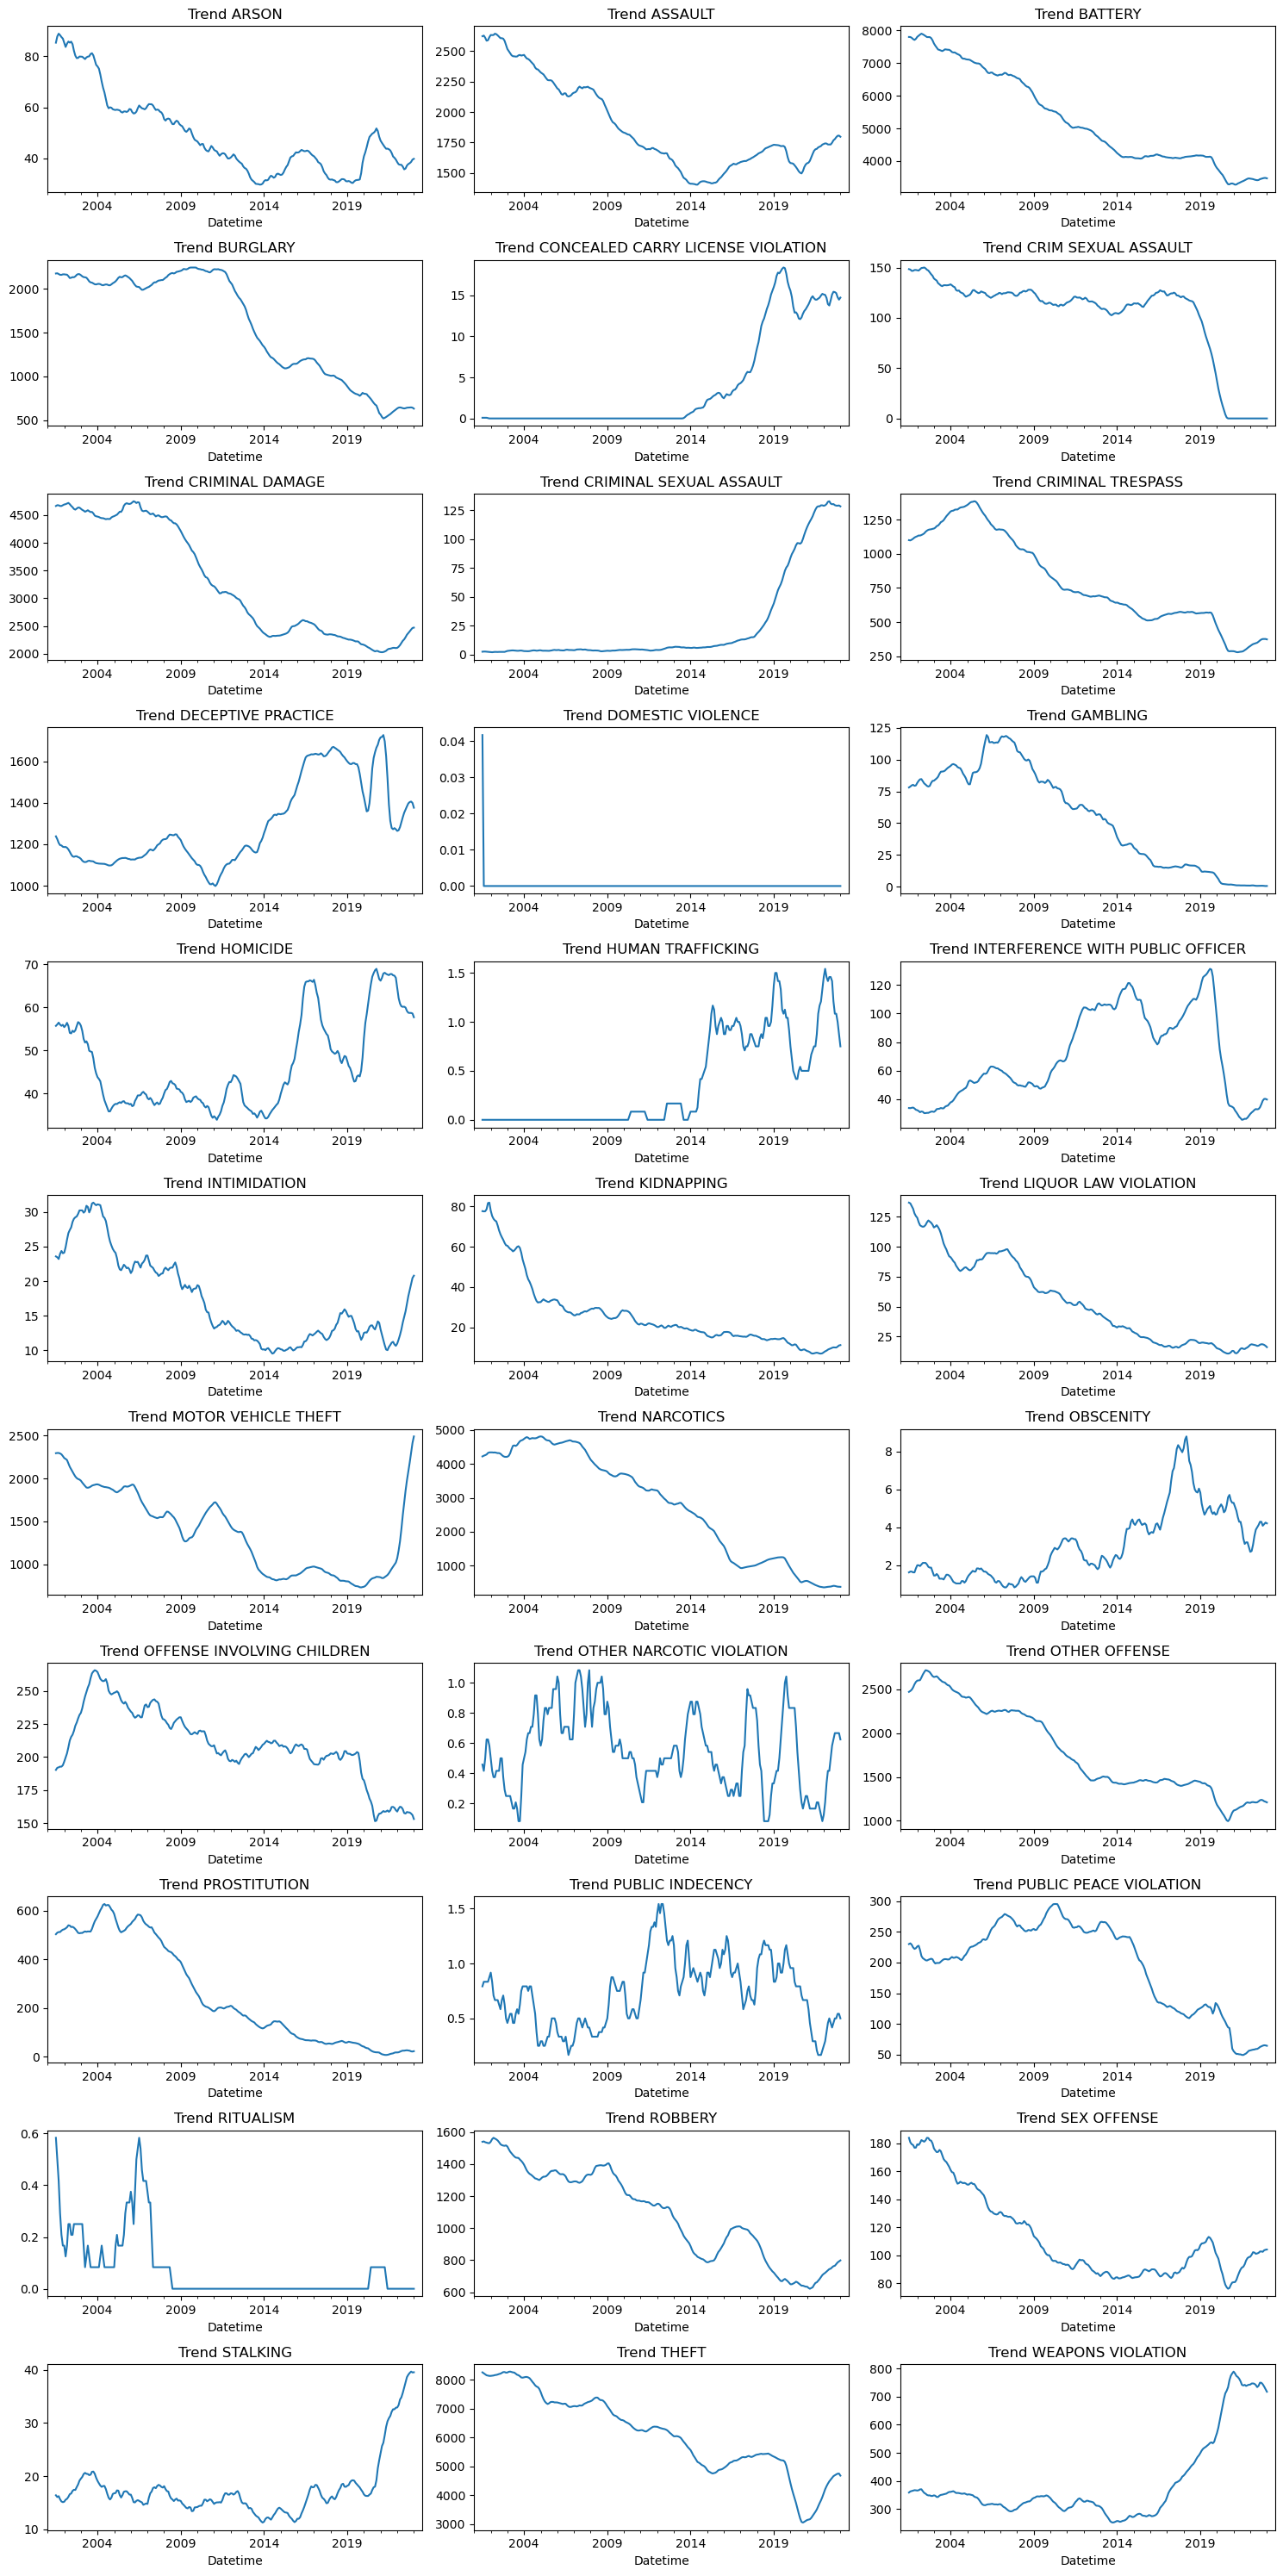

In [59]:
#Trends for the individual crimes

fig, axes = plt.subplots(11, 3, figsize=(15,30))

for indx, crime in enumerate(individual_crimes.columns):
    row = indx // 3
    col = indx % 3
    ts = individual_crimes[crime]
    decomp = tsa.seasonal_decompose(ts)
    
    decomp.trend.plot(title=f'{crime} Trend', ax = axes[row, col])
    axes[row, col].set_title(f'Trend {crime}')
plt.tight_layout();

Overall over the years crime has decreased.

Individual Crimes going against the trend:
    
    -Concealed Carry License Violation
    -Criminal Sexual Assault
    -Deceptive Practice
    -Homicide
    -Human Trafficking
    -Motor Vehicle Theft
    -Stalking
    -Weapons Violations
    
Crimes that are up and down would be other narcotic violations and public indecency.

**Question Four: Comparing Months**

What months have the most crime? What months have the least?

Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [60]:
chicago3 = chicago_final[~not_crime]
chicago3

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,years,Count
Datetime,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258,2001,1
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849,2001,1
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625,2001,1
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,2001,41.899521,-87.672220,2001,1
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.945072,-87.684629,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 12:55:00,13153385,07/26/2023 12:55:00 AM,THEFT,OVER $500,APARTMENT,False,False,421,4.0,7.0,2023,41.754724,-87.554667,2023,1
2023-07-26 12:55:00,13153405,07/26/2023 12:55:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,812,8.0,13.0,2023,41.776031,-87.772534,2023,1
2023-07-26 12:55:00,27653,07/26/2023 12:55:00 AM,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,423,4.0,7.0,2023,41.738604,-87.562388,2023,1


In [62]:
#Extracting the month
chicago3['Month'] = chicago3.index.month
chicago3['MonthName'] = chicago3.index.month_name()
chicago3.head()

/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_61936/392400861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago3['Month'] = chicago3.index.month
/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_61936/392400861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago3['MonthName'] = chicago3.index.month_name()


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,years,Count,Month,MonthName
Datetime,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258,2001,1,1,January
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849,2001,1,1,January
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625,2001,1,1,January
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,2001,41.899521,-87.672220,2001,1,1,January
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.945072,-87.684629,2001,1,1,January


In [63]:
#Saving a lookup for number vs name
unique_months = chicago3.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

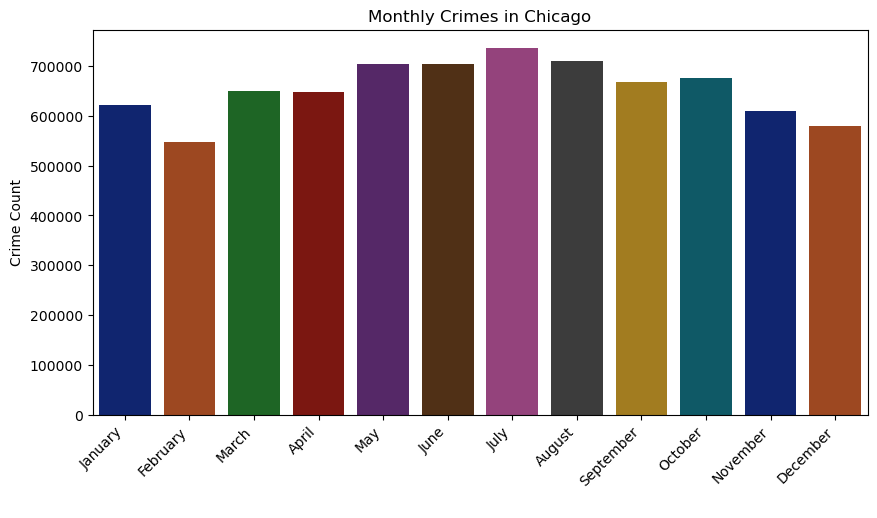

In [64]:
ax = sns.countplot(data=chicago3, x='MonthName',palette='dark',order=month_lookup.values());
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Monthly Crimes in Chicago")
ax.set_ylabel("Crime Count")
ax.set_xlabel(" ");
plt.show()

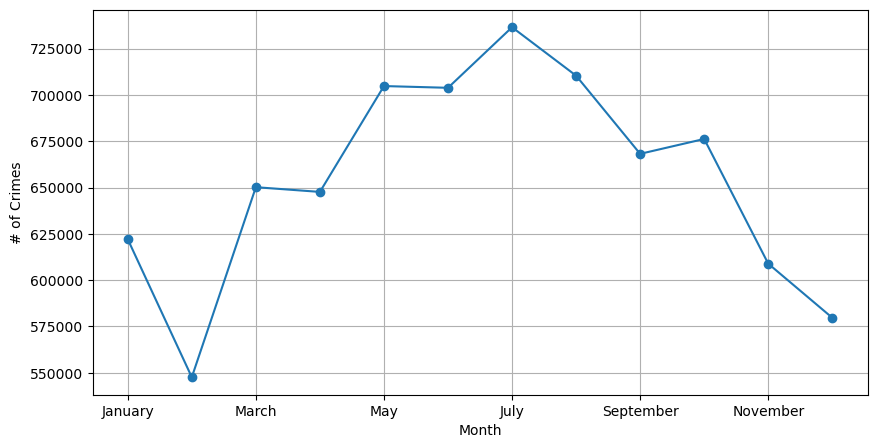

In [65]:
#Count of Crimes per Month
## save month counts
month_counts = chicago3['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

From my plots, we can see that May, June, July and August have the most crime incidents. December and February have the least number of crimes. Seems like more crime during the spring and summer than in the winter

In [66]:
chicago3

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,years,Count,Month,MonthName
Datetime,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,2001,41.940001,-87.654258,2001,1,1,January
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849,2001,1,1,January
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625,2001,1,1,January
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,2001,41.899521,-87.672220,2001,1,1,January
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.945072,-87.684629,2001,1,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 12:55:00,13153385,07/26/2023 12:55:00 AM,THEFT,OVER $500,APARTMENT,False,False,421,4.0,7.0,2023,41.754724,-87.554667,2023,1,7,July
2023-07-26 12:55:00,13153405,07/26/2023 12:55:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,812,8.0,13.0,2023,41.776031,-87.772534,2023,1,7,July
2023-07-26 12:55:00,27653,07/26/2023 12:55:00 AM,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,423,4.0,7.0,2023,41.738604,-87.562388,2023,1,7,July


In [67]:
crime_by_month = chicago3.groupby('Primary Type')['Month', 'MonthName'].value_counts().sort_index()
crime_by_month

/var/folders/x9/3qks5g991w745rj9dzrqqy200000gn/T/ipykernel_61936/4028303710.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_by_month = chicago3.groupby('Primary Type')['Month', 'MonthName'].value_counts().sort_index()


Primary Type       Month  MonthName
ARSON              1      January       963
                   2      February      840
                   3      March        1140
                   4      April        1134
                   5      May          1284
                                       ... 
WEAPONS VIOLATION  8      August       9887
                   9      September    9435
                   10     October      9190
                   11     November     7952
                   12     December     7401
Length: 384, dtype: int64

In [68]:
crime_by_month.index

MultiIndex([(            'ARSON',  1,   'January'),
            (            'ARSON',  2,  'February'),
            (            'ARSON',  3,     'March'),
            (            'ARSON',  4,     'April'),
            (            'ARSON',  5,       'May'),
            (            'ARSON',  6,      'June'),
            (            'ARSON',  7,      'July'),
            (            'ARSON',  8,    'August'),
            (            'ARSON',  9, 'September'),
            (            'ARSON', 10,   'October'),
            ...
            ('WEAPONS VIOLATION',  3,     'March'),
            ('WEAPONS VIOLATION',  4,     'April'),
            ('WEAPONS VIOLATION',  5,       'May'),
            ('WEAPONS VIOLATION',  6,      'June'),
            ('WEAPONS VIOLATION',  7,      'July'),
            ('WEAPONS VIOLATION',  8,    'August'),
            ('WEAPONS VIOLATION',  9, 'September'),
            ('WEAPONS VIOLATION', 10,   'October'),
            ('WEAPONS VIOLATION', 11,  'November

In [69]:
crime_by_month_df = crime_by_month.to_frame('# of Crimes').reset_index()
crime_by_month_df

,Primary Type,Month,MonthName,# of Crimes
0,ARSON,1,January,963
1,ARSON,2,February,840
2,ARSON,3,March,1140
3,ARSON,4,April,1134
4,ARSON,5,May,1284
...,...,...,...,...
379,WEAPONS VIOLATION,8,August,9887
380,WEAPONS VIOLATION,9,September,9435
381,WEAPONS VIOLATION,10,October,9190
382,WEAPONS VIOLATION,11,November,7952


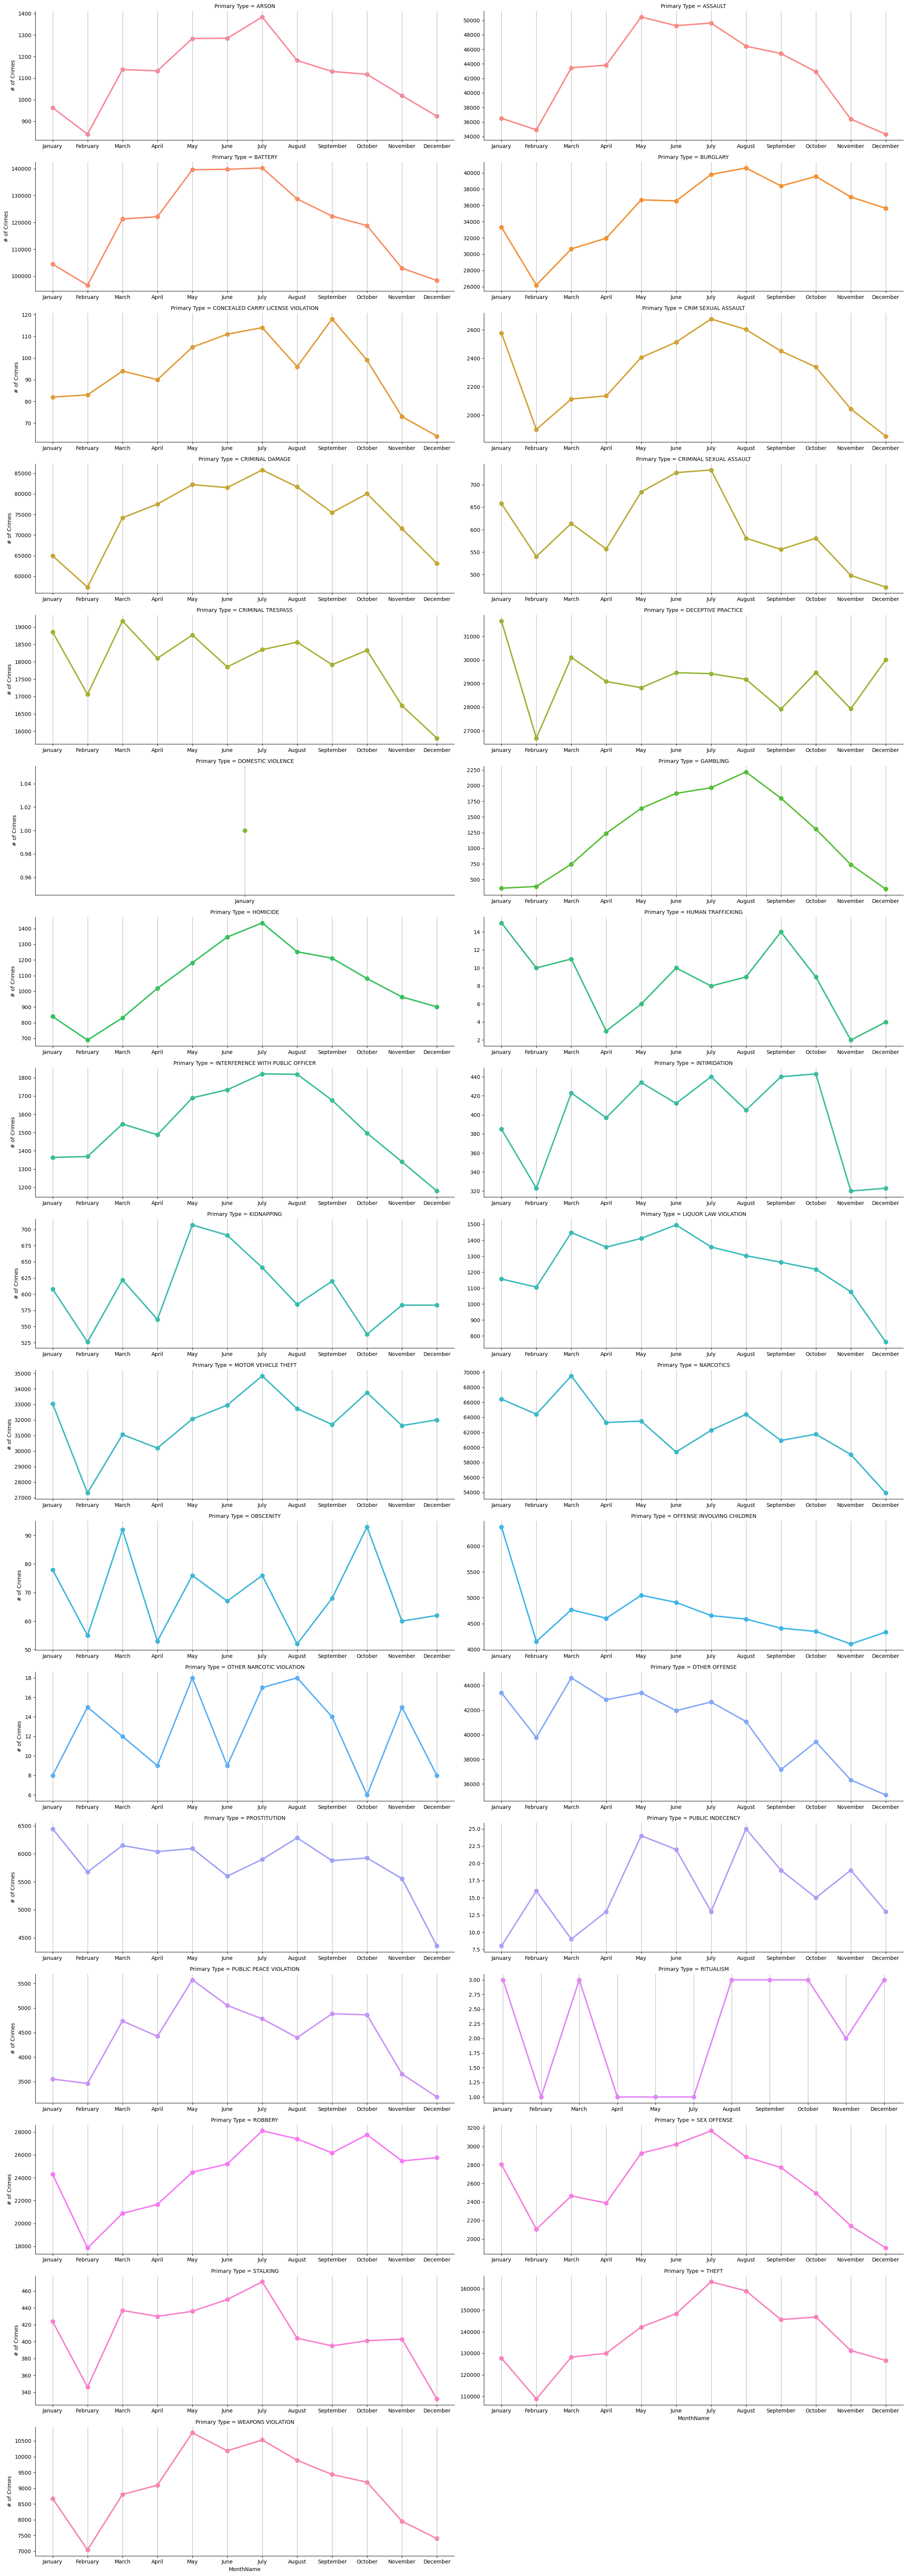

In [70]:
g = sns.catplot(data=crime_by_month_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=3, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

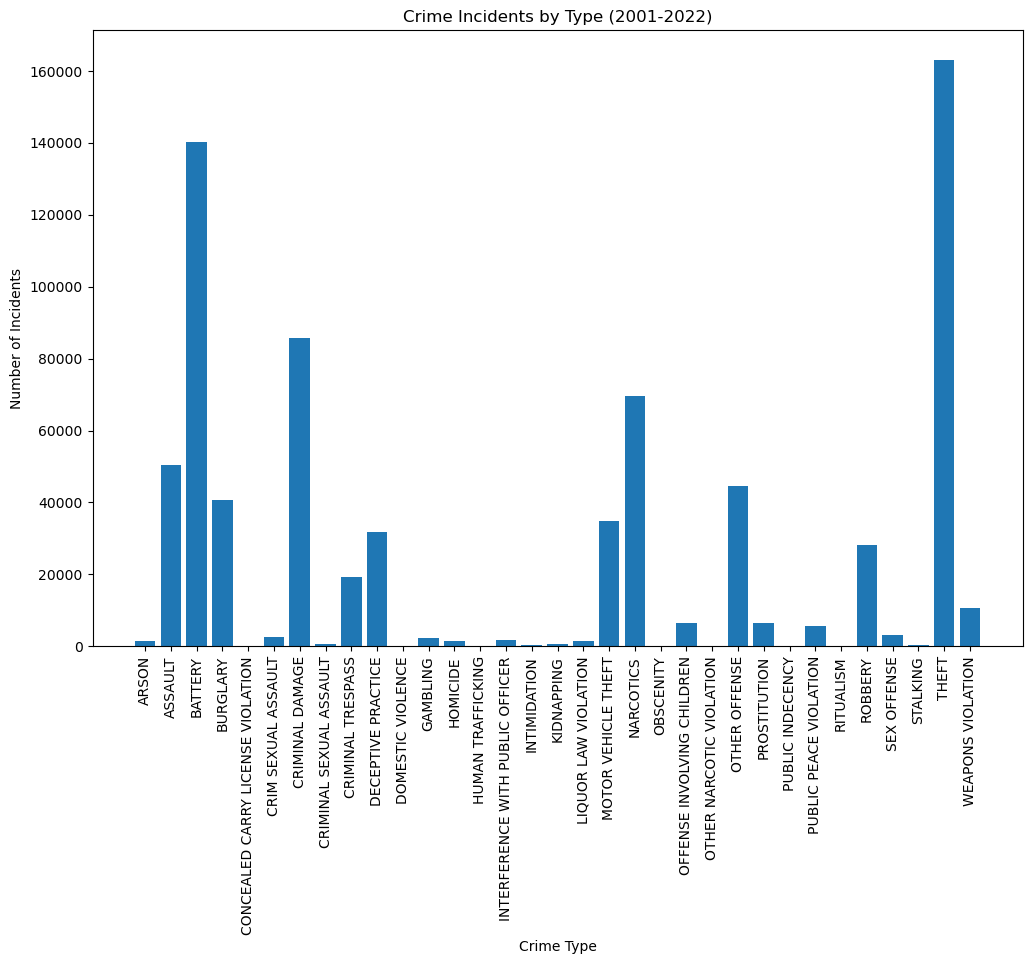

In [73]:
# Create a bar plot of the crime counts
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(crime_by_month_df['Primary Type'], crime_by_month_df['# of Crimes'])

# Set the plot title and axis labels
ax.set_title('Crime Incidents by Type (2001-2022)')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Number of Incidents')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

From my four plots, as stated before we can see that crime is more active for the most part in the spring and summer. Crime is down in the winter but there are some exceptions.

Those exceptions include: Deceptive practice, human trafficking, narcotics, obscenity, offense involving children, other narcotic violation and finally ritualism.